In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,ensemble, tree, model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import datetime as dt
import ml_insights as mli
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

## Dataset Description

* date time year-month-day hour:minute:second 
* TotalConsmp (AC+TV+LED+Peripherals), energy use in Wh (Target)
* R1, Temperature in Room 1, in Celsius
* H_1, Humidity Room 1, in %
* R2, Temperature in Room 2, in Celsius
* H_2, Humidity in Room 2, in %
* R3, Temperature in Room 3, in Celsius
* H_3, Humidity in Room 3, in %
* R4, Temperature Room 4, in Celsius
* H_4, Humidity in Room 4, in %
* R5, Temperature in Room 5, in Celsius
* H_5, Humidity in Room 5, in %
* R6, Temperature Room 6, in Celsius
* H_6, Humidity in Room 6, in %
* R7, Temperature in Room 7, in Celsius
* H_7, Humidity in Room 7, in %
* R8, Temperature in Room 8, in Celsius
* H_8, Humidity in Room 8, in %
* R9, Temperature in Room 9, in Celsius
* H_9, Humidity in Room 9, in %
* To, Temperature outside, in Celsius
* Pressure outside, in mm Hg
* RH_out, Humidity outside, in %
* Windspeed, in m/s
* Visibility, in km

In [3]:
energy_data = pd.read_csv('data.csv')

In [4]:
energy_data.head()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
0,1/11/2016 17:00,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000
1,1/11/2016 17:10,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667
2,1/11/2016 17:20,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333
3,1/11/2016 17:30,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000
4,1/11/2016 17:40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667


In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
date           19735 non-null object
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R6             19735 non-null float64
H_6            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed      19735

In [6]:
energy_data.describe()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834
std,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000
max,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000


# Adding Features

In [7]:
energy_data['datetime'] = pd.to_datetime(energy_data.date)

In [8]:
energy_data['date_only'] = energy_data.datetime.dt.date

In [9]:
energy_data['weekday'] = energy_data.datetime.dt.weekday
energy_data['month'] = energy_data.datetime.dt.month
energy_data['week'] = energy_data.datetime.dt.week

In [10]:
energy_data['hour'] = energy_data.datetime.dt.hour

In [11]:
#Assumptions for day and night- sunrise at 6 am and sunset at 6 pm
energy_data['is_day'] = energy_data.apply(lambda x: 1 if x.hour >= 6 and x.hour < 18 else 0, axis=1)

In [12]:
#sanity check
energy_data.hour.loc[energy_data.is_day == 0].unique()

array([18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5])

In [13]:
def time_of_day(x):
    '''A function to flag different times of the day'''
    
    if x.hour > 3 and x.hour < 12:
        return 'Morning'
    elif x.hour >= 12 and x.hour < 16:
        return 'Afternoon'
    elif x.hour >= 16 and x.hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [14]:
energy_data['time_of_day'] = energy_data.apply(lambda x: time_of_day(x),axis=1)

In [15]:
# Sanity check
energy_data.hour.loc[energy_data.time_of_day == 'Night'].unique()

array([20, 21, 22, 23,  0,  1,  2,  3])

In [16]:
energy_data['is_weekend'] = energy_data.apply(lambda x: 1 if x.weekday > 4 else 0, axis=1)

In [17]:
# Sanity Check
energy_data.weekday.loc[energy_data.is_weekend==1].unique()

array([5, 6])

#### Mean room temperature and humidity - average of temperatures and humidities across all rooms

In [18]:
energy_data['mean_room_temp'] = energy_data[['R1','R2','R3','R4','R5','R6','R7','R8','R9']].mean(axis=1)

In [19]:
energy_data['average_room_humidity'] = energy_data[['H_1','H_2','H_3','H_4','H_5','H_6','H_7','H_8','H_9']].mean(axis=1)

In [20]:
energy_data['diff_ext_int_temp'] = energy_data.mean_room_temp - energy_data.TempOutSide

Plotting the difference between external and internal temperatures across weeks to check to for trends

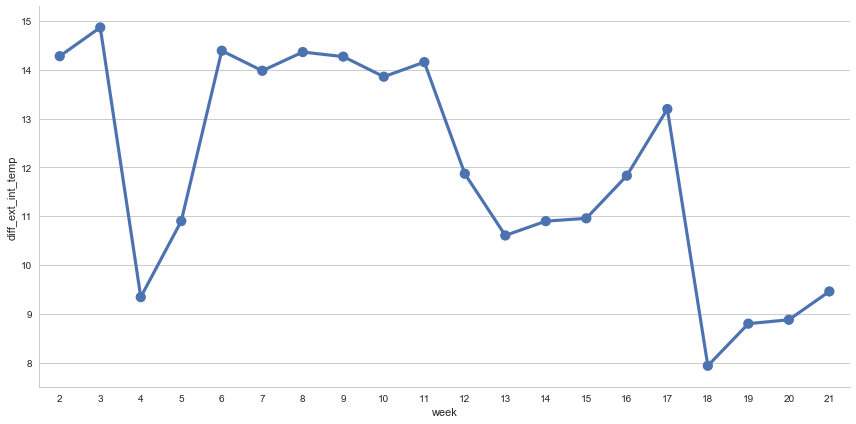

In [21]:
sns.factorplot(x='week',y='diff_ext_int_temp',data=energy_data,ci=None,size=6,aspect=2,estimator=np.mean)

#### Heating Degree Day

If the day's average temperature is lower than 18 C (65 F), then that day is tagged as a heating degree day. It means that the building/room has to be heated to be habitable

In [22]:
# Creating the Heating Degree Day (HDD)
energy_data['TempOutside_F'] = (energy_data['TempOutSide'] *1.8) + 32

daily_min_max = energy_data.groupby('date_only')['TempOutside_F'].agg(['min','max']).reset_index()

daily_min_max['average'] = 0.5 * (daily_min_max['min'] + daily_min_max['max']) 

daily_min_max.columns = ['date_only','min_temp_F','max_temp_F','average_temp_F']

daily_min_max['is_HDD'] = daily_min_max.apply(lambda x: 1 if x.average_temp_F < 65 else 0, axis=1)

In [23]:
daily_min_max.loc[daily_min_max.is_HDD==0]

,date_only,min_temp_F,max_temp_F,average_temp_F,is_HDD
117,2016-05-07,52.34,77.72,65.03,0
118,2016-05-08,53.60,78.98,66.29,0
121,2016-05-11,57.74,74.66,66.20,0


In [24]:
energy_data = energy_data.merge(daily_min_max,on='date_only',how='left')

# Checking the distributions of the different features

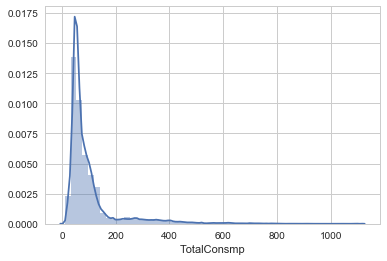

In [25]:
sns.distplot(energy_data.TotalConsmp)

It seems like majority of the energy readings are below 200 Wh. Let us see the time of the day during which the higher energy reading are observed

In [26]:
energy_data.loc[energy_data.TotalConsmp > 800]

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,time_of_day,is_weekend,mean_room_temp,average_room_humidity,diff_ext_int_temp,TempOutside_F,min_temp_F,max_temp_F,average_temp_F,is_HDD
432,1/14/2016 17:00,910,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.700000,42.660000,...,Evening,0,17.505926,46.822222,12.905926,40.2800,33.620,41.90,37.760,1
731,1/16/2016 18:50,1110,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.890000,39.733333,...,Evening,1,18.047037,47.745013,15.967037,35.7440,32.720,42.62,37.670,1
867,1/17/2016 17:30,810,21.500000,36.760000,20.100000,36.077273,20.790000,37.260000,21.000000,36.826667,...,Evening,1,18.066519,43.899512,18.066519,32.0000,27.104,37.58,32.342,1
1307,1/20/2016 18:50,840,17.600000,38.090000,16.960000,38.030000,17.790000,37.390000,16.200000,36.530000,...,Evening,0,15.243210,45.084938,15.393210,31.7300,23.000,33.08,28.040,1
1451,1/21/2016 18:50,1100,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.700000,35.400000,...,Evening,0,15.891111,41.302160,16.508111,30.8894,24.260,40.46,32.360,1
1452,1/21/2016 19:00,910,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.600000,35.133333,...,Evening,0,15.894383,41.669012,16.694383,30.5600,24.260,40.46,32.360,1
1821,1/24/2016 8:30,870,17.600000,44.166667,16.926667,43.230000,18.230000,43.290000,17.523333,45.766667,...,Morning,1,15.661605,52.194815,9.311605,43.4300,41.180,46.58,43.880,1
1823,1/24/2016 8:50,810,17.790000,45.490000,17.133333,43.566667,18.596667,45.693333,18.493333,44.900000,...,Morning,1,15.852593,52.520123,9.332593,43.7360,41.180,46.58,43.880,1
9031,3/14/2016 10:10,860,20.000000,32.730000,19.326667,33.266667,20.033333,34.696667,20.000000,32.100000,...,Morning,0,17.970000,37.523704,15.570000,36.3200,31.640,46.22,38.930,1
10668,3/25/2016 19:00,890,23.200000,40.530000,20.856667,41.030000,25.633333,38.260000,20.500000,38.766667,...,Evening,0,20.314074,41.077407,12.214074,46.5800,34.790,51.08,42.935,1


### From the above table, we can see that the high energy consumptions are occuring mostly during the evenings. Some readings are measured even during the morning. It could be due to the usage of high wattage devices like hair dryers

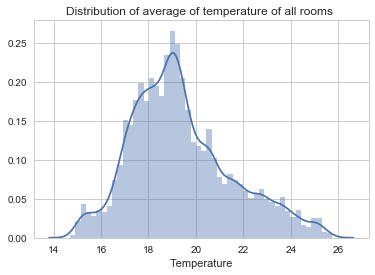

In [27]:
sns.distplot(energy_data.mean_room_temp)
plt.title('Distribution of average of temperature of all rooms ')
plt.xlabel('Temperature')

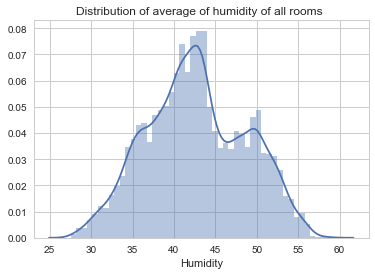

In [28]:
sns.distplot(energy_data.average_room_humidity)
plt.title('Distribution of average of humidity of all rooms ')
plt.xlabel('Humidity')

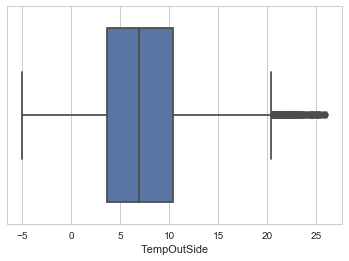

In [29]:
sns.boxplot(energy_data.TempOutSide)

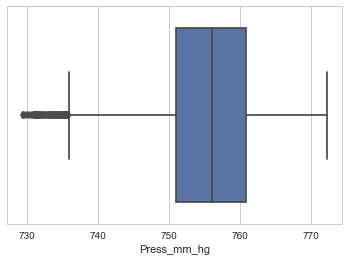

In [30]:
sns.boxplot(energy_data.Press_mm_hg)

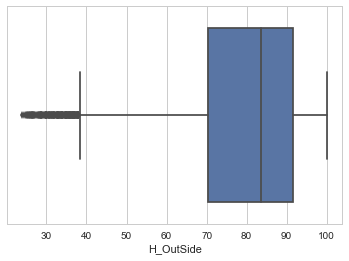

In [31]:
sns.boxplot(energy_data.H_OutSide)

# Checking for correlation between the features and Total Consumption

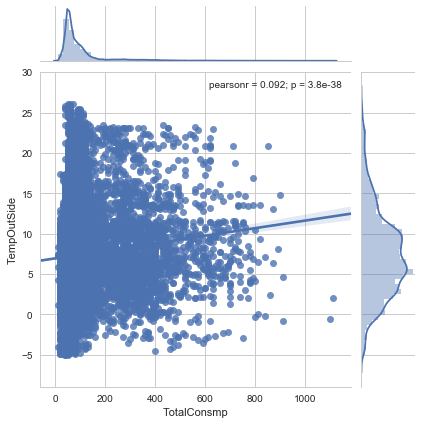

In [32]:
# External Temperature vs Total Consumption
sns.jointplot(energy_data.TotalConsmp, energy_data.TempOutSide,kind='reg')

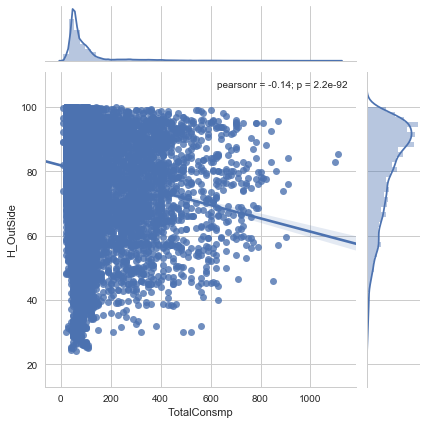

In [33]:
# External Humidity vs Total Consumption
sns.jointplot(energy_data.TotalConsmp, energy_data.H_OutSide, kind='reg')

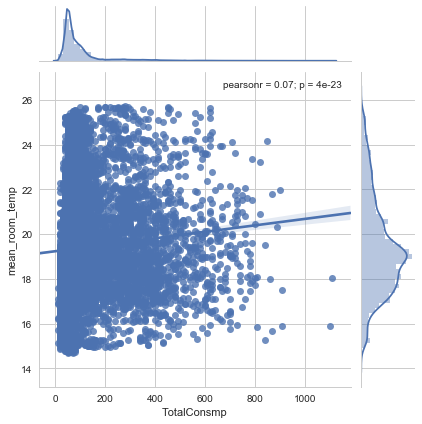

In [34]:
# Mean Room Temperature vs Total Consumption
sns.jointplot(energy_data.TotalConsmp, energy_data.mean_room_temp, kind='reg')

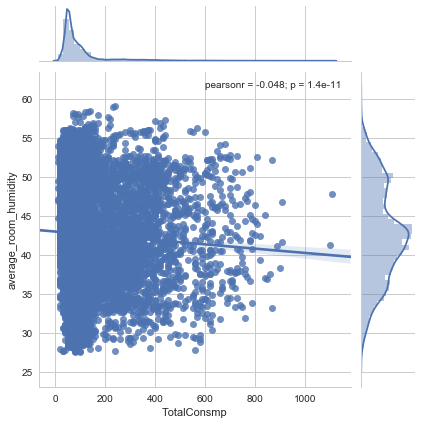

In [35]:
# Average Room Humidity vs Total Consumption
sns.jointplot(energy_data.TotalConsmp, energy_data.average_room_humidity, kind='reg')

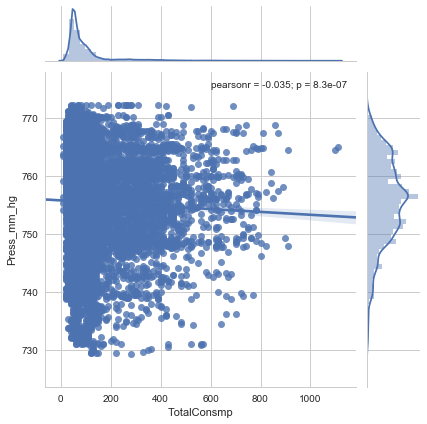

In [36]:
# Pressure vs Total Consumption
sns.jointplot(energy_data.TotalConsmp, energy_data.Press_mm_hg, kind='reg')

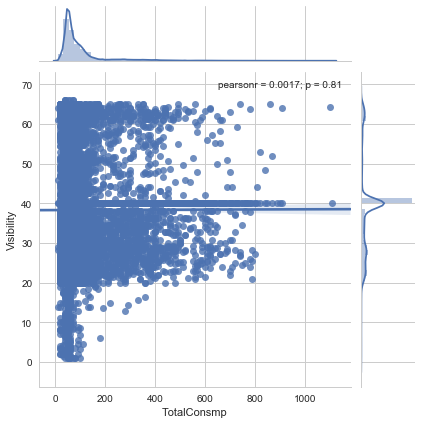

In [37]:
# Visibility vs Total Consumption 
sns.jointplot(energy_data.TotalConsmp, energy_data.Visibility, kind='reg')

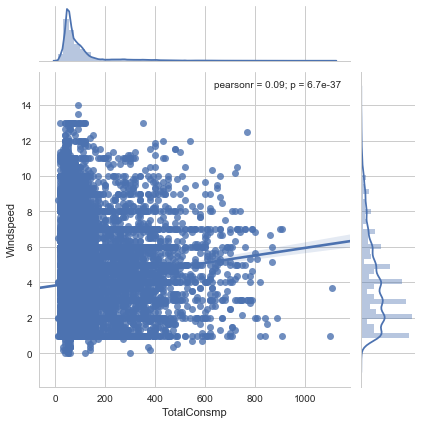

In [38]:
# Windspeed vs Total Consumption
sns.jointplot(energy_data.TotalConsmp, energy_data.Windspeed, kind='reg')

### From the above plots , we can see that Total Consumption has slight positive relationship with-
- External Temperature
- Mean Room Temperature
- Windspeed

# Overall Trends

### Checking monthly trends

In [39]:
overall_month_data = energy_data.groupby('month')['TotalConsmp','TempOutSide'].mean().reset_index()

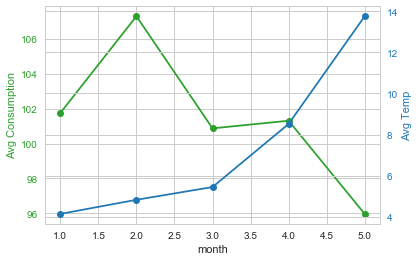

In [40]:
# plotting monthly average total consumption vs monthly average external temperatures

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('month')
ax1.set_ylabel('Avg Consumption', color=color)
ax1.plot(overall_month_data.month, overall_month_data.TotalConsmp, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Avg Temp', color=color)  
ax2.plot(overall_month_data.month, overall_month_data.TempOutSide, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# plt.savefig('tempvscons.png',dpi=300,bbox_inches='tight')

In [41]:
monthly_consump = energy_data.groupby('month')['TotalConsmp'].agg(['mean']).reset_index()

monthly_consump.columns = ['month','avg_consmp']

monthly_consump['%_change_avg'] = monthly_consump.avg_consmp.pct_change() *100

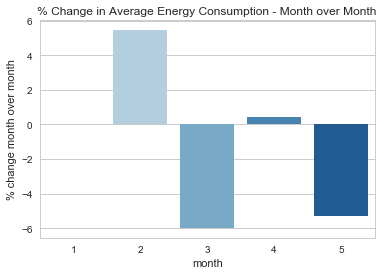

In [42]:
sns.barplot(x='month',y='%_change_avg',data=monthly_consump,palette='Blues')
plt.title('% Change in Average Energy Consumption - Month over Month')
plt.ylabel('% change month over month')

#### Here we see that at the turn of the season, there are dips in the monthly average energy consumption. Thus, increasing external temperature reduces energy consumption

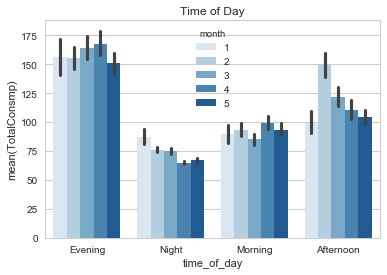

In [43]:
sns.barplot(x='time_of_day',y='TotalConsmp',hue='month',data=energy_data,estimator=np.mean,palette='Blues')
plt.title('Time of Day')

#### Evenings register higher energy consumptions. This could be due to the fact that guests mostly return to their rooms during this time

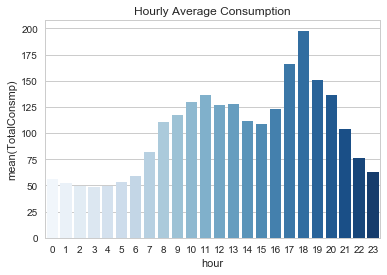

In [44]:
sns.barplot(x='hour',y='TotalConsmp',data=energy_data,\
               ci=None,estimator=np.mean,palette='Blues')
plt.title('Hourly Average Consumption')

#### Peak consumption is at 5 and 6 PM

In [45]:
# Checking weekly time of day consumptions
weekly_table = pd.pivot_table(energy_data,index='time_of_day',values='TotalConsmp',columns='week',aggfunc=np.mean)

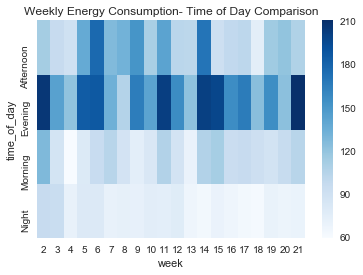

In [46]:
sns.heatmap(weekly_table,cmap='Blues')
plt.title('Weekly Energy Consumption- Time of Day Comparison')

### Checking for trends in Room Temperatures and Humidities

In [47]:
room_temp_weekly = pd.pivot_table(energy_data,index='week',values=['R1','R2','R3','R4','R5','R6','R7','R8','R9'\
                                                                   ,'TempOutSide'],aggfunc=np.mean)

In [48]:
humidity_weekly = pd.pivot_table(energy_data,index='week',values=['H_1','H_2','H_3','H_4','H_5','H_6','H_7'\
                                                                  ,'H_8','H_9','H_OutSide'],aggfunc=np.mean)

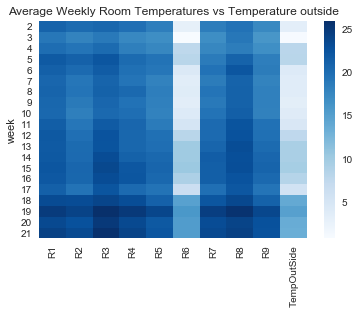

In [49]:
sns.heatmap(room_temp_weekly,cmap='Blues')
plt.title('Average Weekly Room Temperatures vs Temperature outside')

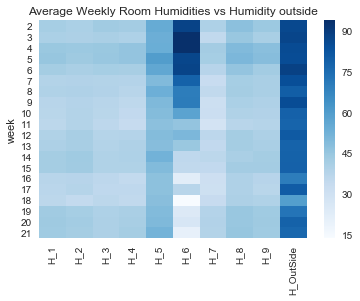

In [50]:
sns.heatmap(humidity_weekly,cmap='Blues')
plt.title('Average Weekly Room Humidities vs Humidity outside')

#### From the above graphs, that Room 6 appears to be unoccupied

# Modeling

In [51]:
X = energy_data[['mean_room_temp','average_room_humidity','Windspeed', 'Visibility',\
                 'is_day','is_HDD','TempOutSide', 'Press_mm_hg', 'H_OutSide','hour']]
y = energy_data.TotalConsmp

#### Doing train test split of 80:20 of the dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Checking the perfomance of multiple regression models using mean squared error and r2 score to determine the best model

In [53]:
models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()
models['ridge_model'] = linear_model.Ridge()
models['lasso_model'] = linear_model.Lasso(alpha=.5)
models['robust_regression'] = linear_model.SGDRegressor(loss='huber',n_iter=20)
models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',n_iter=20)


models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for name,model in models.items():
#     scores = model_selection.cross_val_score(model, X, y, scoring='neg_mean_squared_error')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model: '+name)
    print("RMSE: " + str(mean_squared_error(y_test,y_pred)))
    print('R-squared: '+str(r2_score(y_test,y_pred)))
    print()

/Users/chinnu/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Model: linear_model
RMSE: 9533.51055309
R-squared: 0.0849657937493

Model: ridge_model
RMSE: 9533.41839595
R-squared: 0.0849746390675

Model: lasso_model
RMSE: 9529.91746133
R-squared: 0.0853106616602

Model: robust_regression
RMSE: 10390.6171182
R-squared: 0.00269999867527

Model: eps_insensitive
RMSE: 10235.6221166
R-squared: 0.0175765467686

Model: cart
RMSE: 8492.12136572
R-squared: 0.184919186904

Model: extratrees
RMSE: 8689.9048486
R-squared: 0.165935765083

Model: randomForest
RMSE: 4474.10818343
R-squared: 0.570571406251

Model: adaboostedTrees
RMSE: 23489.471461
R-squared: -1.25453884525

Model: gradboostedTrees
RMSE: 7867.88270025
R-squared: 0.244834128896



### Based on the mean squared error and the r2 score, the Random Forest Regressor performs best on the test set

#### Using the linear regression model to understand how the different variables affect the energy consumption (positive or negative effect)

In [54]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

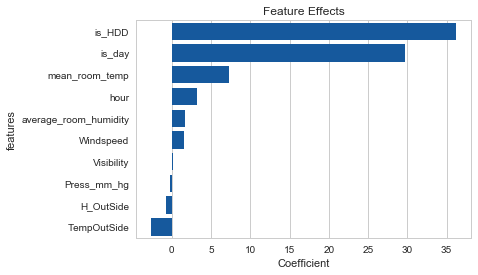

In [55]:
feature_coeff = pd.DataFrame(sorted(list(zip(X.columns,lr.coef_)),key=lambda x: x[1],reverse=True))

feature_coeff.columns = ['features','coefficient']
sns.barplot(x= 'coefficient',y='features',data=feature_coeff,color='#0059b3')
plt.title('Feature Effects')
plt.xlabel('Coefficient')

### Here we can see that-
- If a day is flagged as a heating degree day (HDD), the energy consumption is more
- The greater the room temperatures, greater the energy consumption
- Greater the external temperature, lower the energy consumption


#### Now let us check how the each room is affecting the energy consumption

In [56]:
X = energy_data[['R1', 'R2',  'R3',  'R4', 'R5',  'R6',  'R7',  'R8', 'R9']]
y = energy_data.TotalConsmp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

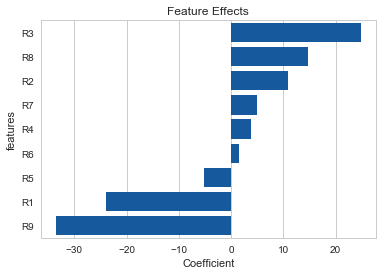

In [57]:
feature_coeff = pd.DataFrame(sorted(list(zip(X.columns,lr.coef_)),key=lambda x: x[1],reverse=True))

feature_coeff.columns = ['features','coefficient']

sns.barplot(x= 'coefficient',y='features',data=feature_coeff,color='#0059b3')
plt.title('Feature Effects')
plt.xlabel('Coefficient')

#### From the above we can conclude that-

- Rooms 3 and 8 consume more energy than all the rooms
- Rooms 1 and 9 uses the lesser energy
- Room 6 has little impact on the energy consumption (confirming that it is empty for the duration of the analysis)


# Performing Cross Validation on the Random Forest Model to check if the model is overfitting on the dataset

In [58]:
X = energy_data[['mean_room_temp','average_room_humidity','Windspeed', 'Visibility',\
                 'is_day','is_HDD','TempOutSide', 'Press_mm_hg', 'H_OutSide','hour']]
y = energy_data.TotalConsmp

In [59]:
kf = KFold(n_splits=10,shuffle=True)
MSE = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    final_model = ensemble.RandomForestRegressor()

    final_model.fit(X_train,y_train)
    y_pred = final_model.predict(X_test)
    MSE.append(np.sqrt(np.mean((y_pred - y_test)**2)))

cross_val = model_selection.cross_val_score(final_model, X, y, cv=kf,n_jobs=-1)

In [60]:
cross_val

array([ 0.61338541,  0.56044623,  0.54039766,  0.58249879,  0.57754078,
        0.58128434,  0.54942106,  0.58662208,  0.57477558,  0.62905436])

In [61]:
np.mean(cross_val)

0.57954262861035377

### Feature importances- Random Forest Regressor

In [62]:
feature_importances = pd.DataFrame(sorted(list(zip(X.columns,final_model.feature_importances_)),\
                                          key=lambda x: x[1], reverse=True))
feature_importances.columns = ['features','importance']

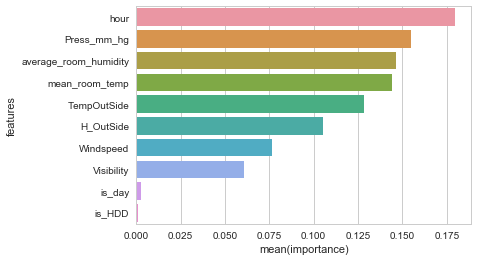

In [63]:
sns.barplot(x='importance',y='features',data=feature_importances)